# Import Libraries

In [1]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Read data

In [2]:
df_train = pd.read_csv('clean data/train.csv')
df_val = pd.read_csv('clean data/val.csv')
df_test = pd.read_csv('clean data/test.csv')

In [3]:
X_train = df_train.drop(columns='price', axis=0).to_numpy()
y_train = df_train['price'].to_numpy()

X_val = df_val.drop(columns='price', axis=0).to_numpy()
y_val = df_val['price'].to_numpy()

X_test = df_test.drop(columns='price', axis=0).to_numpy()
y_test = df_test['price'].to_numpy()

In [4]:
input_dim = X_train.shape[1]
output_dim = 1

# Training

In [5]:
model_checkpoint = ModelCheckpoint(
    filepath = "Model/mlp.h5",
    save_best_only=True)

early_stopping = EarlyStopping(
    patience=5,
    restore_best_weights=True)

reduce_lr_on_plateau = ReduceLROnPlateau(
    verbose = 1,
    factor=0.1,
    patience=2) 

In [6]:
model = Sequential()
model.add(Dense(units=input_dim, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(units=8, activation='sigmoid'))
model.add(Dense(units=output_dim))

In [7]:
# compile network
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mse'])
# fit network
history = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_val, y_val), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr_on_plateau])

Epoch 1/200
368/368 [==============================] - 1s 2ms/step - loss: 28.7103 - mse: 28.7103 - val_loss: 18.2806 - val_mse: 18.2806
Epoch 2/200
368/368 [==============================] - 0s 1ms/step - loss: 14.8386 - mse: 14.8386 - val_loss: 12.4980 - val_mse: 12.4980
Epoch 3/200
368/368 [==============================] - 1s 1ms/step - loss: 11.3142 - mse: 11.3142 - val_loss: 10.7032 - val_mse: 10.7032
Epoch 4/200
368/368 [==============================] - 1s 2ms/step - loss: 10.3354 - mse: 10.3354 - val_loss: 10.2993 - val_mse: 10.2993
Epoch 5/200
368/368 [==============================] - 1s 2ms/step - loss: 10.1464 - mse: 10.1464 - val_loss: 10.2429 - val_mse: 10.2429
Epoch 6/200
368/368 [==============================] - 0s 1ms/step - loss: 10.1210 - mse: 10.1210 - val_loss: 10.2365 - val_mse: 10.2365
Epoch 7/200
368/368 [==============================] - 0s 1ms/step - loss: 10.1175 - mse: 10.1175 - val_loss: 10.2332 - val_mse: 10.2332
Epoch 8/200
368/368 [====================

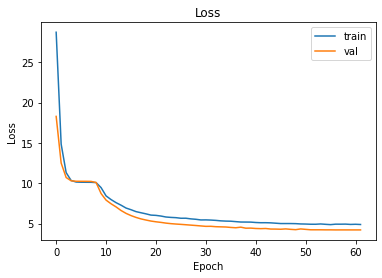

In [8]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# Result

In [9]:
y_pred = model.predict(X_test)
y_pred = np.reshape(y_pred, y_pred.shape[0])

In [10]:
# y_pred = np.power(np.e, y_pred) - 1
# y_test = np.power(np.e, y_test) - 1

In [11]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('MAE:', mae)
print('RMSE:', rmse)
print('MAPE:', mape)

MAE: 1.4902213017918604
RMSE: 2.0502284074441
MAPE: 0.3036455888423381


In [12]:
def plot_evaluate(y_true, y_pred):
    plt.plot(y_true, y_pred, 'b.')
    x = [np.min(y_true), np.max(y_true)]
    y = x
    plt.plot(x, y, 'r')
    plt.title('MLP')
    plt.xlabel('Reality')
    plt.ylabel('Predict')
    plt.show()

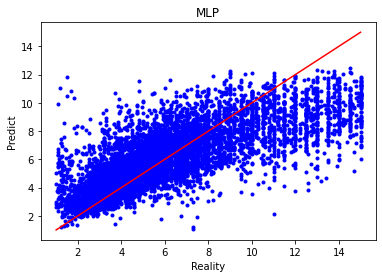

In [13]:
plot_evaluate(y_test, y_pred)